Zadanie 1 - Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny Lagrange'a . Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji.

In [1]:
function Lagrange(xs, ys, x)
    P = 0
    for i in 1:size(xs)[1]
        l = 1
        for j in 1:size(xs)[1]
            if j != i
                l *= (x-xs[j])/(xs[i]-xs[j])
            end
        end
        P += (ys[i] * l)
    end
    return P
end

Lagrange (generic function with 1 method)

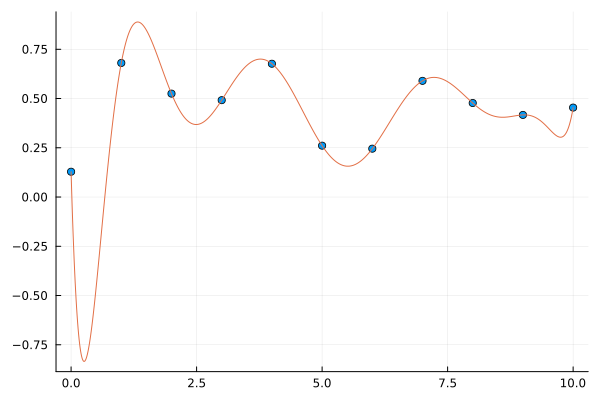

In [2]:
using Plots

# wylosowanie węzłów interpolacji
xs =  0:1:10
ys = [rand() for x in xs]

test = 0:0.01:10
polynomial = [Lagrange(xs, ys, x) for x in test]

scatter(xs, ys)
plot!(test, polynomial, legend=false)

Zadanie 2 - Zrobic to samo dla metody Newtona (metoda ilorazów róznicowych).Narysować wykres wielomianu interpolacyjnego otrzymanego metodą Newtona dla tych samych danych, co w poprzednim punkcie. Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ :

napisać funkcję NewtonInterpolation, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" newt
napisać funkcję która wylicza wartość wielomianu dla obiektu newt w punkcie x za pomocą schematu Hornera dla postaci Newtona (2 pkt)

In [3]:
function NewtonInterpolation(xs, ys)
    T = Float64[]
    for a in 1:size(xs)[1]
        push!(T,ys[a])
        for i in 1:a-1
            nom = T[end]-T[end-a+1]
            den = xs[a] - xs[a-i]
            push!(T,nom/den)
        end
    end
    newt = Float64[]
    k = 0
    for i in 1:size(xs)[1]
        k = k + i
        push!(newt,T[k])
    end
    return newt
end

NewtonInterpolation (generic function with 1 method)

In [4]:
function Newton(table, xs, x)
    n = size(xs)[1]
    b = table[n]
    for i=1:n-1
        b = table[n - i] + b * (x - xs[n - i])
    end
    return b
end

Newton (generic function with 1 method)

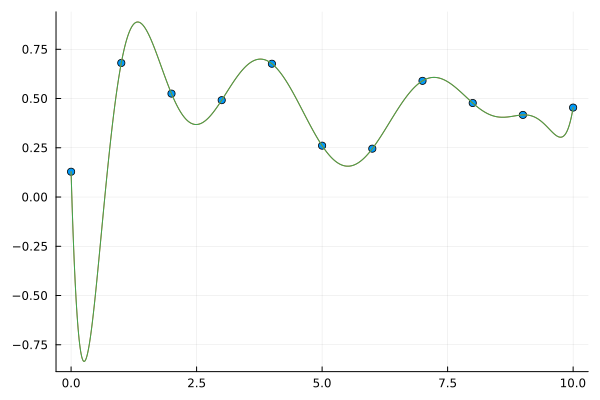

In [5]:
test = 0:0.01:10

table = NewtonInterpolation(xs, ys)
newton = [Newton(table, xs, x) for x in test]

plot!(test,newton)

Zadanie 3 - Zastosować interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego?

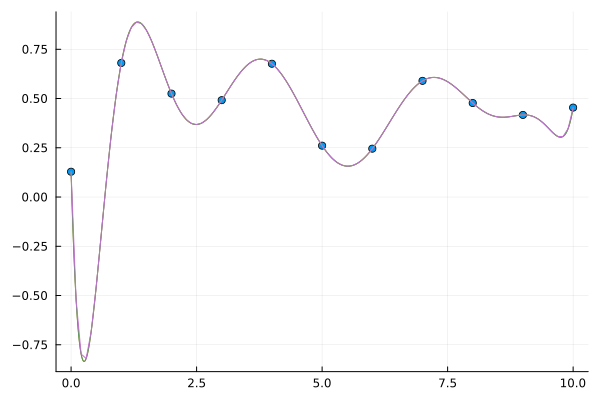

In [6]:
using Polynomials

f = fit(xs, ys)
plot!(f, extrema(xs)...)

W zasadzie wszystkie interpolacje się ze sobą pokrywają. Wyjnika to z twierdzenia o jednoznaczności: Jeżeli liczby (węzły) x0, x1,…, xn są parami różne, to istnieje dokładnie jeden wielomian p∈Pn taki, że p(xi)= yi, i=0, 1,…,n.

Zadanie 4 - Porównać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Uwaga: dodatkowo, dla metody Newtona i pakietu Polynomials należy osobno zmierzyć czas wyliczania wielomianu i osobno czas wyliczania wartości w punkcie. Dokonać pomiaru 10 razy i policzyć wartość średnią oraz oszacować błąd pomiaru za pomocą odchylenia standardowego; wyniki przedstawić na wykresach.

In [14]:
using DataFrames

df = DataFrame(n=Int[], lagrange=Float64[], newton1=Float64[], newton2=Float64[], polynomial1=Float64[], polynomial2=Float64[])

for i in 10:100:1000
    for j in 1:10
        width = 10/i
        x_axis = 0:width:10
        y_axis = [rand() for x in x_axis]
        test = 0:0.01:10
        lagr, time1 = @timed [Lagrange(x_axis,y_axis,x) for x in test]
        newt, time2 = @timed NewtonInterpolation(x_axis, y_axis)
        newt2, time3 = @timed [Newton(newt,x_axis,x) for x in test]
        polyn, time4 = @timed fit(x_axis,y_axis)
        polyn2, time5 = @timed [polyn(x) for x in test]
        if j > 2
            push!(df,(i,time1,time2,time3,time4,time5))
        end
    end
end

df

Row,n,lagrange,newton1,newton2,polynomial1,polynomial2
,Int64,Float64,Float64,Float64,Float64,Float64
1,10,0.000394,2.5e-6,3.02e-5,2.5e-6,6.6e-6
2,10,0.0003944,1.7e-6,2.55e-5,2.3e-6,6.4e-6
3,10,0.0003952,1.3e-6,3.78e-5,1.6e-6,6.1e-6
4,10,0.0003914,1.6e-6,2.5e-5,1.3e-6,6.0e-6
5,10,0.0003911,1.6e-6,2.5e-5,1.4e-6,6.0e-6
6,10,0.0003911,1.0e-6,2.82e-5,1.2e-6,5.8e-6
7,10,0.0003907,1.0e-6,2.68e-5,1.2e-6,5.9e-6
8,10,0.0004398,1.3e-6,2.63e-5,1.4e-6,6.0e-6
9,110,0.0377288,5.67e-5,0.0002748,4.68e-5,7.64e-5


In [8]:
using Statistics

df_combined = combine(groupby(df, :n), :lagrange => mean => :m_lagrange,:lagrange => std => :s_lagrange,
    :newton1 => mean => :m_newton1, :newton1 => std => :s_newton1,
    :newton2 => mean => :m_newton2, :newton2 => std => :s_newton2,
    :polynomial1 => mean => :m_polynomial1, :polynomial1 => std => :s_polynomial1,
    :polynomial2 => mean => :m_polynomial2, :polynomial2 => std => :s_polynomial2)

df_combined

Row,n,m_lagrange,s_lagrange,m_newton1,s_newton1,m_newton2,s_newton2,m_polynomial1,s_polynomial1,m_polynomial2,s_polynomial2
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10,0.000587613,0.000207546,3.525e-6,1.6193e-6,4.4175e-5,2.87961e-5,5.325e-6,5.12884e-6,9.225e-6,3.53179e-6
2,110,0.0420586,0.00153804,9.83625e-5,1.47073e-5,0.000264588,3.48156e-6,3.63125e-5,1.40045e-6,8.02125e-5,2.78795e-6
3,210,0.170522,0.0235499,0.000292587,4.09349e-5,0.000572937,0.000114217,0.000132062,5.43956e-5,0.000204988,3.27334e-5
4,310,0.365407,0.0497375,0.000626937,6.75862e-5,0.000845537,0.000143936,0.000259938,3.36116e-5,0.000299175,3.22889e-5
5,410,0.650589,0.0768883,0.00584235,0.0129748,0.00104126,0.000114005,0.000437175,8.68301e-5,0.000417563,7.35935e-5
6,510,0.9622,0.10916,0.00168851,0.000315878,0.00142736,0.000582164,0.000785775,0.000246183,0.000524812,9.97358e-5
7,610,1.22431,0.108071,0.00237993,0.000600498,0.00146321,0.000202417,0.000871687,9.93376e-5,0.00060545,7.96388e-5
8,710,1.63924,0.0163711,0.00266596,0.000276504,0.00169078,0.000394355,0.00122973,0.000353566,0.000635175,2.05674e-5
9,810,2.22969,0.019371,0.00545792,0.00492708,0.00196593,0.000378126,0.00160532,0.000401747,0.000762763,5.60523e-5


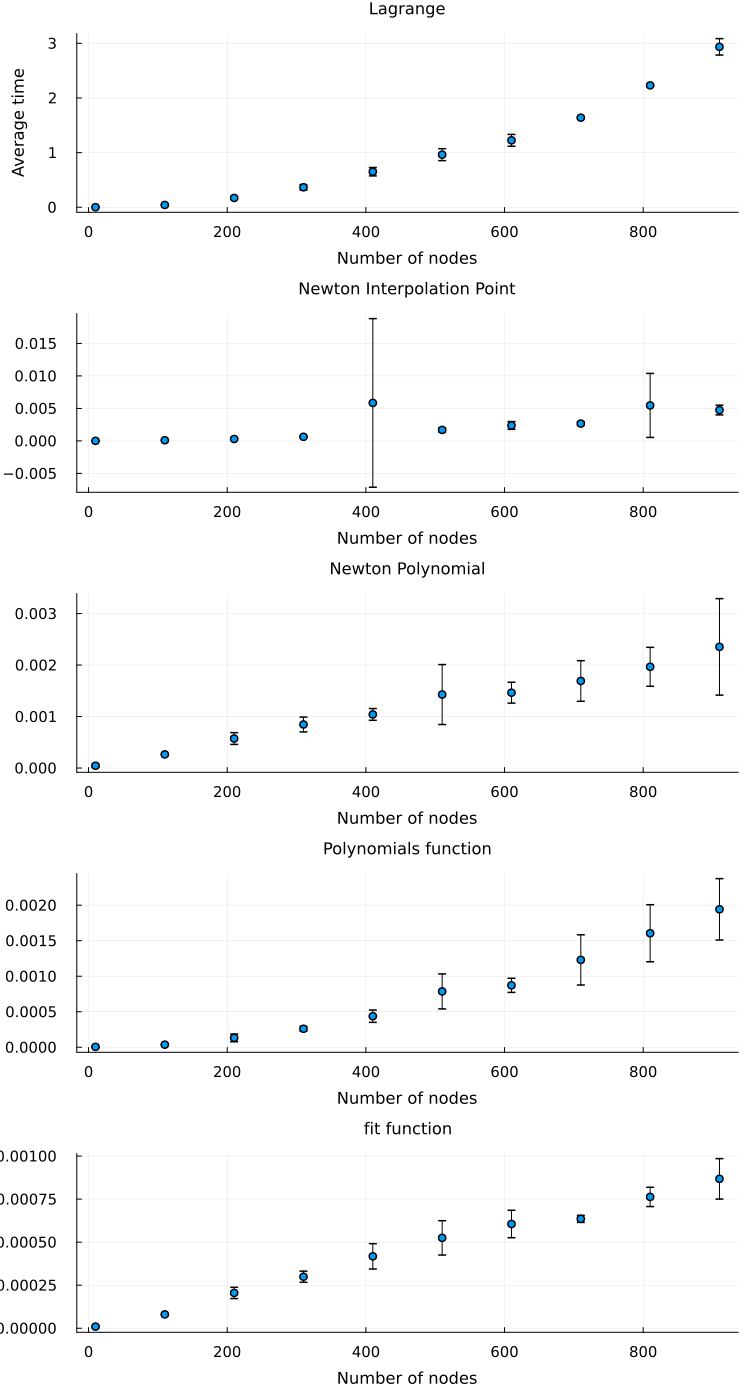

In [9]:
scatter(
    df_combined.n,
    size = (750, 1400),
    xtickfontsize=10, 
    ytickfontsize=10, 
    titlefontsize = 11,
    xlabel = "Number of nodes",
    ylabel = "Average time",
    [df_combined.m_lagrange,df_combined.m_newton1,df_combined.m_newton2,df_combined.m_polynomial1,df_combined.m_polynomial2], 
    title = ["Lagrange" "Newton Interpolation Point" "Newton Polynomial" "Polynomials function" "fit function"], 
    yerr = [df_combined.s_lagrange df_combined.s_newton1 df_combined.s_newton2 df_combined.s_polynomial1 df_combined.s_polynomial2], 
    layout = grid(5,1),
    legend = false
)

Zadanie 5 - Zaimplementować algorytm Neville’a i sprawdzić (dla kilku wybranych punktów), czy daje te same wartości wielomianu co wybrana interpolacja wielomianowa.

In [10]:
function Neville(xs, ys, x)
    n = size(xs)[1]
    t = zeros(Float64, n, n)
    
    for i in 1:n
        t[i, 1] = ys[i]
    end
    
    for i=2:n
        for j=i:n
            t[j, i] = ((x - xs[j]) * t[j - 1, i - 1] - (x - xs[j - i + 1]) * t[j, i - 1]) / (xs[j - i + 1] - xs[j])
        end
    end
    
    return t[n,n]
end


Neville (generic function with 1 method)

In [11]:
points = [0.1, 1.1, 20]
xs = 0:1:10
ys = [rand() for x in xs]

for point in points
    println("Point: ", point)
    println("Neville's interpolation: ", Neville(xs, ys, point))
    println("Lagrange's interpolaiton: ", Lagrange(xs, ys, point))
    println("-------------------")
end
    

Point: 0.1
Neville's interpolation: 5.416453067334988
Lagrange's interpolaiton: 5.41645306733499
-------------------
Point: 1.1
Neville's interpolation: 0.17217533113503114
Lagrange's interpolaiton: 0.17217533113503108
-------------------
Point: 20.0
Neville's interpolation: -3.271001169928645e7
Lagrange's interpolaiton: -3.2710011699286457e7
-------------------
